## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [19]:
df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [42]:
df1 = df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
         ((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))]

print(df1.shape)
print(df1['user_id'].nunique())

(3893, 5)
3893


f. Do any of the rows have missing values?

In [43]:
print(df1.info())

print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 22 to 294331
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       3893 non-null   int64 
 1   timestamp     3893 non-null   object
 2   group         3893 non-null   object
 3   landing_page  3893 non-null   object
 4   converted     3893 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 182.5+ KB
None
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [45]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
df2.shape

(290585, 5)

In [46]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [47]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [59]:
print(df2['user_id'].duplicated().sum())
print('\n')
print(df2.loc[df2['user_id'].duplicated() == True]['user_id'])

1


2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [66]:
df2.loc[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [68]:
df2 = df2.loc[df2['user_id'].duplicated() == False]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [69]:
df2[df2['converted']==1].shape[0]/ df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [70]:
df2[(df2['converted']==1) & (df2['group']== 'control') ].shape[0]/ (df2[df2['group']=='control'].shape[0])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [71]:
df2[(df2['converted']==1) & (df2['group']== 'treatment') ].shape[0]/ (df2[df2['group']=='treatment'].shape[0])

0.11880806551510564

d. What is the probability that an individual received the new page?

In [72]:
df2[(df2['landing_page']=='new_page')].shape[0]/ df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Summary - 

1. Probability of an individual converting regardless of the page they received is 11.96%
2. Probability that an individual was in Control group and they converted is 12.04%
3. Probability that an individual was in Treatment group and they converted is 11.88%
4. Probability that an individual received the new page is 50.00%

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

𝑝𝑜𝑙𝑑 is Conversion rates for the old page.
𝑝𝑛𝑒𝑤 is Conversion rates for the new page.

Null Hypothesis: Conversion rate for old page is not less than new page i.e. 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤.
In mathematical terms, 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0

Alternate Hypothesis: Conversion rate for old page is less than new page i.e. 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤.
In mathematical terms, 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [87]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [81]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [85]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [83]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [95]:
new_page_converted = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
new_page_converted.sum()

17507

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [96]:
old_page_converted = np.random.choice([1,0], size = n_old, replace = True, p = [p_old, (1-p_old)])
old_page_converted.sum()

17283

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [97]:
new_page_converted.mean() - old_page_converted.mean()

0.0015120579547296537

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [98]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
    old_page_converted = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

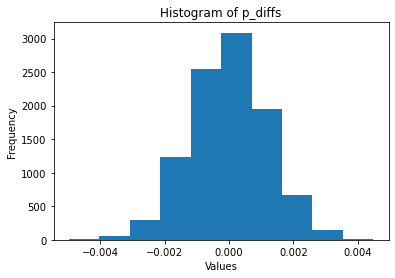

In [101]:
plt.hist(p_diffs)
plt.title('Histogram of p_diffs')
plt.ylabel('Frequency')
plt.xlabel('Values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [104]:
p_actual_old = df2.query("group == 'control'").converted.mean()
p_actual_new = df2.query("group == 'treatment'").converted.mean()
actual_diff = p_actual_new - p_actual_old
actual_diff

-0.0015782389853555567

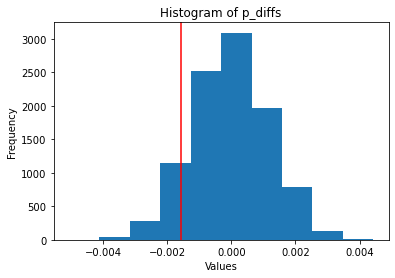

In [108]:
p_diffs = np.array(p_diffs)
null_val = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_val);
plt.axvline(actual_diff, color = 'r')
plt.title('Histogram of p_diffs')
plt.ylabel('Frequency')
plt.xlabel('Values');

In [110]:
(null_val > actual_diff).mean()

0.9062

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We assumed that the null hypothesis is true. With that, we assume that p_old >= p_new, so both pages have the same converting rates over the whole sample. Therefore we also assume, that the individual converting probability of each page is equal to the one of the whole sample. Based on that, we bootstrapped a sampling distribution for both pages and calculated the differences in the converting probability per page with n equal to the original number of people who received each page. With the resulting standard deviation of the differences (which is coming from the simulated population), we then calcualted values coming from a normal distribution around 0. As last step we calculated the proportion of values which are bigger than the actually observed difference. The calculated p-value now tells us the probability of receiving this observed statistic if the null hypothesis is true. With a Type-I-Error-Rate of 0.05, we can say that 0.9062 > 0.05, therefore we don't have enough evidence to reject the null hypothesis and we fail to reject the Null Hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [111]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [112]:
from scipy.stats import norm

#calculate z-test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

#calculate the critical z_term
z_critical=norm.ppf(1-(0.05))

print("Z-Score: ",z_score, "\nCritical Z-Score: ", z_critical, "\nP-Value: ", p_value)

Z-Score:  1.3109241984234394 
Critical Z-Score:  1.6448536269514722 
P-Value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

As p-value is not less than 0.05 (Test Statistic is less than Critical Score), we fail to reject te Null Hypothesis.

To conclude, the conversion rate of the old page is equal to or more than the conversion of the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We want to classify the transaction into one of two categories "Conversion" or "No Conversion". We can use binary classification method like Logistic Regression to solve the same.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [113]:
df3 = df2.copy()
df3.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [114]:
#add intercept
df3["intercept"] = 1

#get dummies and rename
df3 = df3.join(pd.get_dummies(df3['group']))
df3.rename(columns = {"treatment": "ab_page"}, inplace=True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [115]:
y = df3["converted"]
x = df3[["intercept", "ab_page"]]

#load model
log_mod = sm.Logit(y,x)

#fit model
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [116]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:08:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

The p-value associated with ab_page is 0.190. This is because the approach of calculating the p-value is different for each case. For the first case we calculate the probability receiving an observed statistic if the null hypothesis is true. Therefore this is a one-sided test. However, the ab_page p-value is the result of a two sided test, because the null hypothesis for this case is, that there is no significant relationship between the conversion rate and ab_page. Therefore give us a variable with a low p value "a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable" (http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other features to consider could be extracts of the time stamp, for example the day of the week or the gender/income infrastructure (if this data would be available). This could lead to more precise results and a higher accuracy. The disadvantages are the increasing complexity of interpretation and the possible introduction of multicollinearity. However, the last problem can be solved with calculating the VIF's.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [118]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [122]:
# Encoding categorical variables
categ = ['country', 'group', 'landing_page']

for i in categ:
    dummies = pd.get_dummies(df_new[i], drop_first = True)
    dummies = dummies.add_prefix("{}#".format(i))
    df_new.drop(i, axis = 1, inplace = True)
    df_new = df_new.join(dummies)

In [125]:
df_new.head(5)

,timestamp,converted,country#UK,country#US,group#treatment,landing_page#old_page
user_id,,,,,,
834778,2017-01-14 23:08:43.304998,0,1,0,0,1
928468,2017-01-23 14:44:16.387854,0,0,1,1,0
822059,2017-01-16 14:04:14.719771,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,0,1,0,0,1
710616,2017-01-16 13:14:44.000513,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [129]:
#Create intercept variable
df_new['intercept'] = 1
#Create Logit regression model for converted and country, and use CA and new page as baseline
y = df_new['converted']
x = df_new[['intercept','landing_page#old_page','country#UK','country#US']]
logit_model = sm.Logit(y, x)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:23:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -2.0450      0.027    -76.820      0.000      -2.097      -1.993
landing_page#old_page     0.0149      0.011      1.307      0.191      -0.007       0.037
country#UK                0.0506      0.028      1.784      0.074      -0.005       0.106
country#US                0.0408      0.027      1.516      0.130      -0.012       0.093
=========================================================================================
"""

In [133]:
# Creating interaction terms
df_new['US_oldpage'] = df_new['landing_page#old_page']* df_new['country#UK']
df_new['UK_oldpage'] = df_new['landing_page#old_page']* df_new['country#US']

In [134]:
y = df_new["converted"]
x = df_new[["intercept", "group#treatment", "country#US", "country#UK", "US_oldpage", "UK_oldpage"]]

log_mod = sm.Logit(y,x)
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        14:35:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.0040      0.036    -55.008      0.000      -2.075      -1.933
group#treatment    -0.0674      0.052     -1.297      0.195      -0.169       0.034
country#US          0.0644      0.038      1.679      0.093      -0.011       0.140
country#UK          0.0901      0.040      2.225      0.026       0.011       0.169
US_oldpage         -0.0783      0.057     -1.378      0.168      -0.190       0.033
UK_oldpage         -0.0469      0.054     -0.872      0.383      -0.152       0.059
===================================================================================
"""

In [136]:
np.exp(results.params)

intercept          0.134794
group#treatment    0.934776
country#US         1.066532
country#UK         1.094247
US_oldpage         0.924703
UK_oldpage         0.954198
dtype: float64

Based on the results obtained, it can be seen that interaction terms are not able to explain the variance in the dataset. They are non-significant. Hence, it does not make sense to add them to the model.